# **SYED MUSTJAB HYDER**

# **🍇 Wild Blueberry Yield Prediction**

#        **Hyperparameter Tuning**

# **Problem Statement:**
The target feature is **yield** which is a continuous variable. The task is to predict this variable based on the other 17 features step-by-step and Hyperparameter Tuning.

1-Pandas

2-Data Exploration

3-IQR

4-Correlation

5-Visualization

In [34]:
pip install klib

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [36]:
df = pd.read_csv("/content/WildBlueberryPollinationSimulationData.csv")
# To display the top 5 rows
df.head(5)

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [37]:
df.tail(5)

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
772,772,10.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.486815,0.428012,33.447471,5333.873335
773,773,40.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.342841,0.377915,28.462005,3373.436842
774,774,20.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.404617,0.401670,30.748240,4203.027624
775,775,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,3.77,0.06,0.401538,0.399935,30.582161,4166.299735
776,776,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,24.00,0.39,0.384646,0.392303,29.742583,3943.131681


In [38]:
# checking the types of data
df.dtypes

Row#                      int64
clonesize               float64
honeybee                float64
bumbles                 float64
andrena                 float64
osmia                   float64
MaxOfUpperTRange        float64
MinOfUpperTRange        float64
AverageOfUpperTRange    float64
MaxOfLowerTRange        float64
MinOfLowerTRange        float64
AverageOfLowerTRange    float64
RainingDays             float64
AverageRainingDays      float64
fruitset                float64
fruitmass               float64
seeds                   float64
yield                   float64
dtype: object

<Axes: >

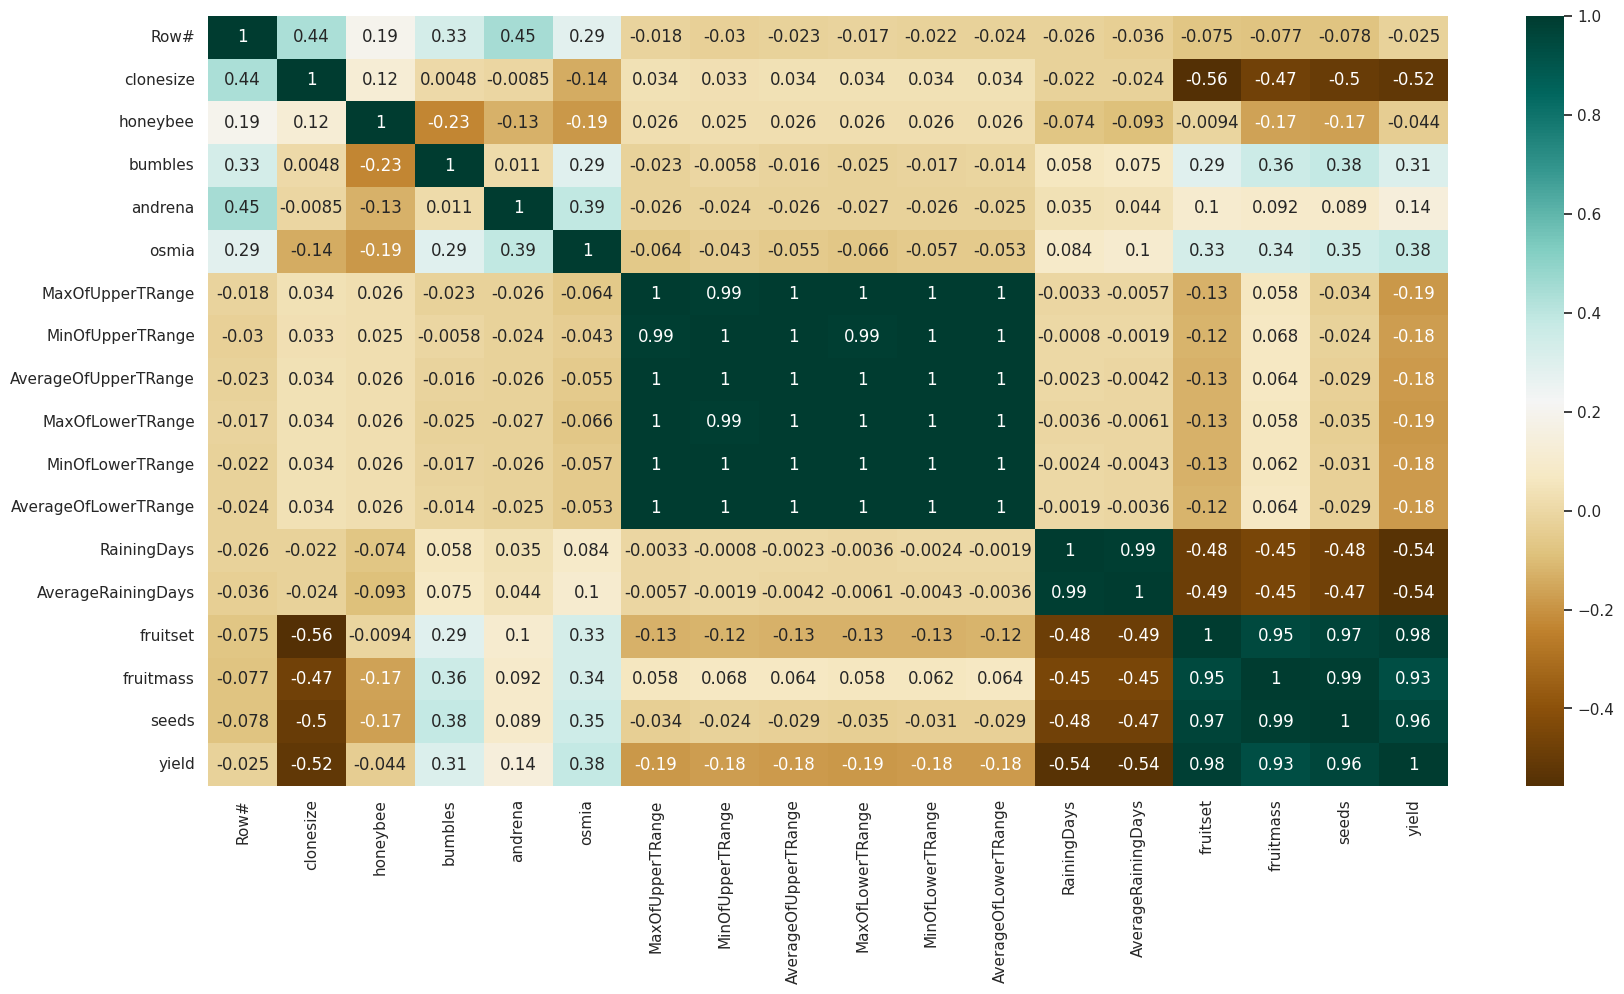

In [39]:
# Adjusting the Size of Figure
plt.figure(figsize=(20,10))
# calculating the Correlation
correlation = df.corr()
# Displaying the correlation using the Heap Map
sns.heatmap(correlation,cmap="BrBG",annot=True) # Br: Brown. B: Blue, G: Green

#correlation

# **Data Reduction**
After the correlation and displaying heetmap it shows that MaxOfUpperTRange

MinOfUpperTRange

AverageOfUpperTRange

MaxOfLowerTRange

MinOfLowerTRange

AverageOfLowerTRange

RainingDays
are hihgly correlated and no need to pass these features to the model. Dropping of these features have no effect on the RMSE(Root Mean Squre Error)

In [40]:
# Dropping irrelevant columns
df = df.drop([ 'Row#'], axis=1)
df = df.drop([ 'MaxOfUpperTRange'], axis=1)
df = df.drop([ 'MinOfUpperTRange'], axis=1)
df = df.drop([ 'MaxOfLowerTRange'], axis=1)
df = df.drop([ 'MinOfLowerTRange'], axis=1)
df = df.drop([ 'RainingDays'], axis=1)
df.head(5)

,clonesize,honeybee,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,37.5,0.75,0.25,0.25,0.25,71.9,50.8,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.75,0.25,0.25,0.25,71.9,50.8,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.75,0.25,0.25,0.25,79.0,55.9,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.75,0.25,0.25,0.25,79.0,55.9,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.75,0.25,0.25,0.25,71.9,50.8,0.39,0.354413,0.382703,28.873714,3436.493543


<Axes: >

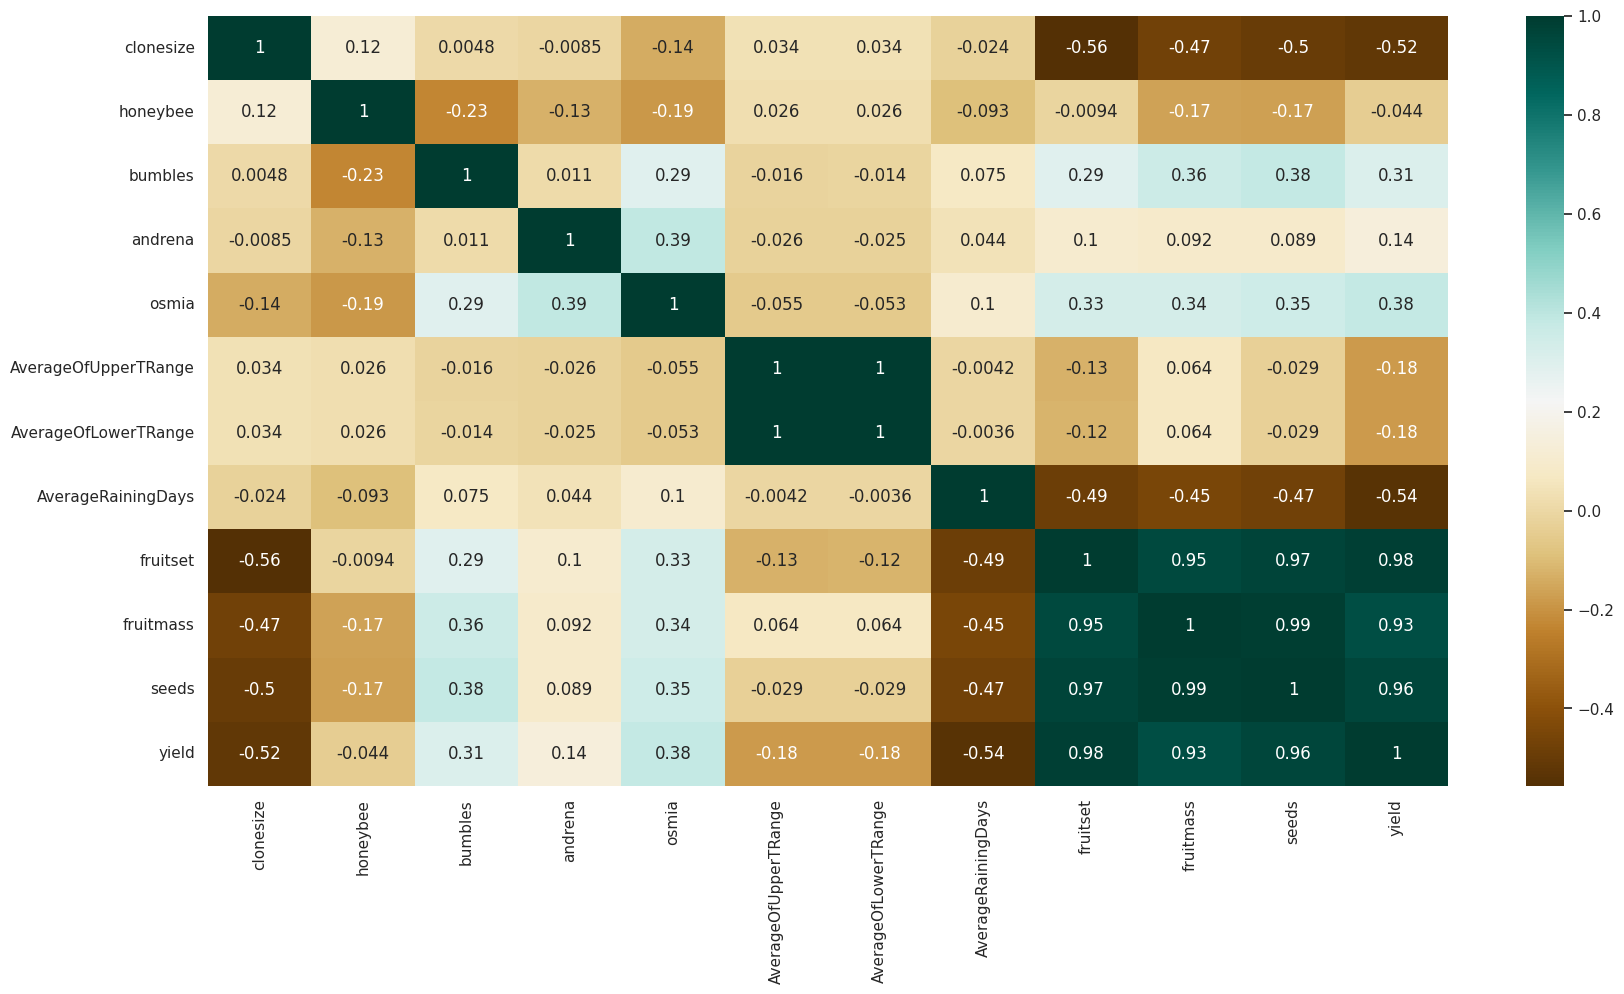

In [41]:
# Adjusting the Size of Figure
plt.figure(figsize=(20,10))
# calculating the Correlation
correlation = df.corr()
# Displaying the correlation using the Heap Map
sns.heatmap(correlation,cmap="BrBG",annot=True) # Br: Brown. B: Blue, G: Green

#correlation

In [42]:
df.shape
df.dtypes

clonesize               float64
honeybee                float64
bumbles                 float64
andrena                 float64
osmia                   float64
AverageOfUpperTRange    float64
AverageOfLowerTRange    float64
AverageRainingDays      float64
fruitset                float64
fruitmass               float64
seeds                   float64
yield                   float64
dtype: object

In [43]:
df.describe()

,clonesize,honeybee,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,18.767696,0.417133,0.282389,0.468817,0.562062,68.723037,48.613127,0.320000,0.502121,0.445983,36.122432,6012.849165
std,6.999063,0.978904,0.066343,0.161052,0.169119,7.676984,5.417072,0.171279,0.079445,0.040333,4.377889,1356.955318
min,10.000000,0.000000,0.000000,0.000000,0.000000,58.200000,41.200000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,12.500000,0.250000,0.250000,0.380000,0.500000,64.700000,45.800000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,12.500000,0.250000,0.250000,0.500000,0.630000,71.900000,50.800000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,25.000000,0.500000,0.380000,0.630000,0.750000,71.900000,50.800000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,40.000000,18.430000,0.585000,0.750000,0.750000,79.000000,55.900000,0.560000,0.652144,0.535660,46.585105,8969.401842


In [44]:
# Counting the number of Rows
df.count()

clonesize               777
honeybee                777
bumbles                 777
andrena                 777
osmia                   777
AverageOfUpperTRange    777
AverageOfLowerTRange    777
AverageRainingDays      777
fruitset                777
fruitmass               777
seeds                   777
yield                   777
dtype: int64

<Axes: title={'center': 'Feature-correlation (pearson)'}>

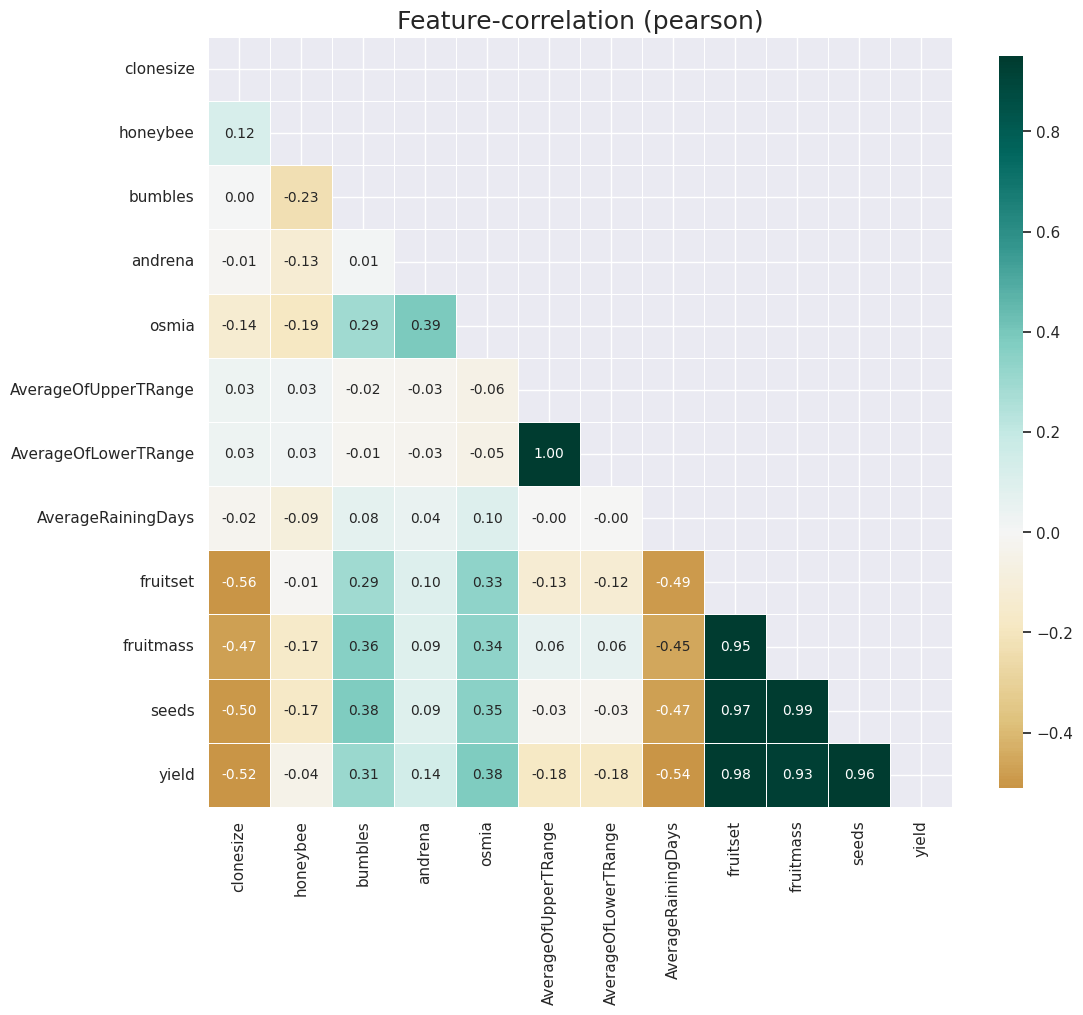

In [45]:
import klib

klib.corr_plot(df)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             777 non-null    float64
 1   honeybee              777 non-null    float64
 2   bumbles               777 non-null    float64
 3   andrena               777 non-null    float64
 4   osmia                 777 non-null    float64
 5   AverageOfUpperTRange  777 non-null    float64
 6   AverageOfLowerTRange  777 non-null    float64
 7   AverageRainingDays    777 non-null    float64
 8   fruitset              777 non-null    float64
 9   fruitmass             777 non-null    float64
 10  seeds                 777 non-null    float64
 11  yield                 777 non-null    float64
dtypes: float64(12)
memory usage: 73.0 KB


# **Target Variable Splitting**

In [47]:
# Split data to be used in the models
# Create matrix of features
x = df.drop('yield', axis = 1) # grabs everything else but 'Yield'

# Create target variable
y = df['yield'] # y is the column we're trying to predict
y # y represents the Target
y.shape

(777,)

In [48]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .10, random_state = 101)

In [49]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state = 2021)

In [50]:
# make a dictionary of hyperparameter values to search
search_space = {
    "n_estimators" : [100, 200, 500],
    "max_depth" : [3, 6, 9],
    "gamma" : [0.01, 0.1],
    "learning_rate" : [0.001, 0.01, 0.1, 1]
}

# **GridSearchCV**

In [51]:
from sklearn.model_selection import GridSearchCV
# make a GridSearchCV object
GS = GridSearchCV(estimator = xgb_model,
                  param_grid = search_space,
                  scoring = ["r2", "neg_root_mean_squared_error"], #sklearn.metrics.SCORERS.keys()
                  refit = "r2",
                  cv = 5,
                  verbose = 4)

# **Model Training Using GridSearchCV**

In [52]:
# Training the model
GS.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-1266.965) r2: (test=0.164) total time=   0.1s
[CV 2/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-1212.784) r2: (test=0.165) total time=   0.0s
[CV 3/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-1223.288) r2: (test=0.172) total time=   0.1s
[CV 4/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-1176.342) r2: (test=0.157) total time=   0.1s
[CV 5/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-1244.245) r2: (test=0.170) total time=   0.1s
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-1156.660) r2: (test=0.303) tot

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=2021, ...),
             param_grid={'gamma': [0.01, 0.1],
                         'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [100, 200, 500]},
             refit='r2', scoring=['r2', 'neg_root_mean_squared_error'],
             verbose=4)

In [53]:
print(GS.best_estimator_) # to get the complete details of the best model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.01, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=2021, ...)


In [54]:
print(GS.best_params_) # to get only the best hyperparameter values that we searched

{'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}


In [55]:
print(GS.best_score_) # score according to the metric we passed in refit

0.9885609478658042


In [56]:
df = pd.DataFrame(GS.cv_results_)
df = df.sort_values("rank_test_r2")
df.to_csv("cv_results.csv", index = False)